In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import geopandas as gpd
from bokeh.plotting import figure, output_file, show
from bokeh.io import output_notebook, show
output_notebook()

Loading BokehJS ...

In [2]:
filename = 'cleaned_data.csv'
df = pd.read_csv(filename)

In [3]:
df.head()

,Unnamed: 0,SOLD DATE,PROPERTY TYPE,ADDRESS,CITY,ZIP,PRICE IN K,BEDS,BATHS,LOCATION,...,LOT SIZE,YEAR BUILT,$/SQUARE FEET,HOA/MONTH,URL (SEE http://www.redfin.com/buy-a-home/comparative-market-analysis FOR INFO ON PRICING),SOURCE,MLS#,LATITUDE,LONGITUDE,COUNTY
0,0,NaN,SFH,1123 Brunswick St,DALY CITY,94014,100.5,2.0,1.0,NaN,...,2500.0,1916.0,98.0,NaN,http://www.redfin.com/CA/Daly-City/1123-Brunsw...,NaN,NaN,37.705789,-122.456480,SAN MATEO
1,1,NaN,SFH,17382 Via La Jolla,SAN LORENZO,94580,101.0,3.0,2.0,NaN,...,5200.0,1951.0,82.0,NaN,http://www.redfin.com/CA/San-Lorenzo/17382-Via...,NaN,NaN,37.665810,-122.135079,ALAMEDA
2,2,NaN,Condo,1750 Halford Ave Apt 105,SANTA CLARA,95051,102.0,1.0,1.0,NaN,...,NaN,1970.0,150.0,NaN,http://www.redfin.com/CA/Santa-Clara/1750-Half...,NaN,NaN,37.355715,-121.998715,SANTA CLARA
3,3,NaN,SFH,888 Palm St,SAN JOSE,95110,102.0,2.0,1.0,NaN,...,6750.0,1913.0,115.0,NaN,http://www.redfin.com/CA/San-Jose/888-Palm-St-...,NaN,NaN,37.319633,-121.886415,SANTA CLARA
4,4,NaN,SFH,1431 86th Ave,OAKLAND,94621,102.5,2.0,1.0,NaN,...,5320.0,1927.0,100.0,NaN,http://www.redfin.com/CA/Oakland/1431-86th-Ave...,NaN,NaN,37.753451,-122.176025,ALAMEDA


In [4]:
county = df.groupby('COUNTY')['PRICE IN K'].mean()
county.head()

COUNTY
ALAMEDA           850.846672
SAN FRANCISCO    1426.789903
SAN MATEO        1565.657834
SANTA CLARA      1312.776768
Name: PRICE IN K, dtype: float64

In [5]:
county = county.reset_index()

In [6]:
county

,COUNTY,PRICE IN K
0,ALAMEDA,850.846672
1,SAN FRANCISCO,1426.789903
2,SAN MATEO,1565.657834
3,SANTA CLARA,1312.776768


In [7]:
output_file('hbar.html')
p=figure(title='house price in different countries', x_axis_label='COUNTY', y_axis_label='PRICE IN K')
p.circle(np.array(county['COUNTY']), np.array(county['PRICE IN K']), color='darkgrey', size=4)
show(p)

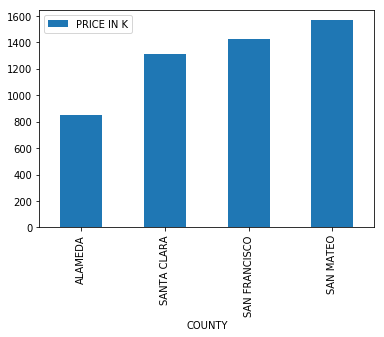

In [8]:
county = county.sort_values(by=['PRICE IN K'])
county.plot(kind = 'bar', x = 'COUNTY', y = 'PRICE IN K')
plt.show()

In [9]:
ptype = df.groupby('PROPERTY TYPE')['PRICE IN K'].mean()
ptype = ptype.reset_index()
ptype.head()

,PROPERTY TYPE,PRICE IN K
0,Condo,731.741132
1,SFH,1421.805332
2,TH,883.018833


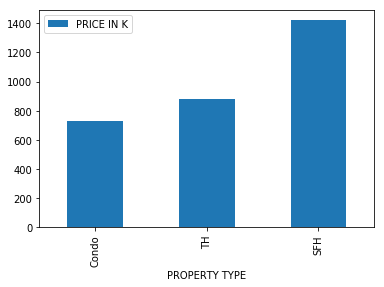

In [10]:
ptype = ptype.sort_values(by=['PRICE IN K'])
ptype.plot(kind = 'bar', x = 'PROPERTY TYPE', y = 'PRICE IN K')
plt.show()

In [11]:
county_type = df.groupby(['COUNTY', 'PROPERTY TYPE'])['PRICE IN K'].mean()
county_type = county_type.reset_index()
county_type

,COUNTY,PROPERTY TYPE,PRICE IN K
0,ALAMEDA,Condo,556.185273
1,ALAMEDA,SFH,951.140964
2,ALAMEDA,TH,648.958521
3,SAN FRANCISCO,Condo,1248.404161
4,SAN FRANCISCO,SFH,1626.607154
5,SAN FRANCISCO,TH,1358.769289
6,SAN MATEO,Condo,773.759020
7,SAN MATEO,SFH,1775.772733
8,SAN MATEO,TH,1102.104827
9,SANTA CLARA,Condo,687.655057


In [12]:
output_file('type_value.html')
p = figure(plot_width=400, plot_height=400)
p.vbar(x=ptype['PROPERTY TYPE'], width=0.5, bottom=0,
       top=ptype['PRICE IN K'], color="navy")

show(p)

In [173]:
city = pd.pivot_table(df, values = 'PRICE IN K', index = 'CITY', columns = 'PROPERTY TYPE', aggfunc = np.mean)
city

PROPERTY TYPE,Condo,SFH,TH
CITY,,,
ALAMEDA,823.632441,1019.271272,753.581305
ALBANY,484.538722,984.626286,812.750000
ATHERTON,457.000000,7346.131127,1250.000000
BELMONT,698.041515,1609.261607,1100.608696
BERKELEY,714.874627,1231.810165,994.750000
BRISBANE,694.156170,971.816557,986.750000
BROADMOOR,NaN,879.500000,NaN
BURLINGAME,1041.192908,2171.041348,1115.761905
CAMPBELL,613.815938,1223.943726,837.988525
